In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### sleep, brain_volume_ratio_to_baseline_____VS_____final diagnosischanges 


#### sleep_brain_finaldxch.csv
#### drop column 'NPIKSEV', otherwise we get no samples

In [17]:
com_col = ['Phase', 'RID', 'VISCODE','PTID','RID_Phase']

In [3]:
sleep_brain_finaldxch = pd.read_csv('sleep_brain_finaldxch.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
sleep_brain_finaldxch = sleep_brain_finaldxch[sleep_brain_finaldxch['final_dxch'].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
sleep_brain_finaldxch

,RID,Phase,VISCODE,PTID,RID_Phase,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,...,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI1,NaN,011_S_0002,2_ADNI1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ADNI1,NaN,011_S_0002,2_ADNI1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADNI1,NaN,011_S_0002,2_ADNI1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ADNI1,NaN,011_S_0002,2_ADNI1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,ADNI1,NaN,011_S_0002,2_ADNI1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,6948,ADNI3,m12,035_S_6948,6948_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5409,6950,ADNI3,m12,035_S_6950,6950_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5410,6952,ADNI3,m12,073_S_6952,6952_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5411,6987,ADNI3,m12,021_S_6987,6987_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### sleep______VS______final_dxch

In [5]:
col_lst = [ 'final_dxch','NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT',  'insomnia','OSA']
sleep_finaldxch = sleep_brain_finaldxch[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
sleep_finaldxch

,Phase,RID,VISCODE,PTID,RID_Phase,final_dxch,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
0,ADNI2,8,v06,011_S_0008,8_ADNI2,CN-MCI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,1.0,0.0
1,ADNI2,61,v11,023_S_0061,61_ADNI2,AD-AD,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,3.0,1.0,0.0
2,ADNI2,61,v21,023_S_0061,61_ADNI2,AD-AD,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,ADNI2,112,v06,127_S_0112,112_ADNI2,MCI-AD,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,0.0
4,ADNI2,112,v11,127_S_0112,112_ADNI2,MCI-AD,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,2.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,ADNI3,6467,y1,168_S_6467,6467_ADNI3,MCI-AD,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,4.0,1.0,0.0
142,ADNI3,6632,y1,099_S_6632,6632_ADNI3,MCI-AD,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,6.0,1.0,0.0
143,ADNI3,6677,y2,006_S_6677,6677_ADNI3,MCI-MCI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,0.0
144,ADNI3,6688,y1,130_S_6688,6688_ADNI3,MCI-CN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,1.0,0.0


In [6]:
np.sum(sleep_finaldxch.isna())   # check nan

Phase         0
RID           0
VISCODE       0
PTID          3
RID_Phase     0
final_dxch    0
NPIK1         0
NPIK2         0
NPIK3         0
NPIK4         0
NPIK5         0
NPIK6         0
NPIK7         0
NPIK8         0
NPIK9A        0
NPIK9B        0
NPIK9C        0
NPIKTOT       0
insomnia      0
OSA           0
dtype: int64

In [7]:
sleep_finaldxch.groupby('final_dxch').count()

,Phase,RID,VISCODE,PTID,RID_Phase,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,insomnia,OSA
final_dxch,,,,,,,,,,,,,,,,,,,
AD-AD,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
AD-MCI,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CN-AD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CN-CN,7,7,7,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
CN-MCI,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
MCI-AD,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
MCI-CN,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
MCI-MCI,19,19,19,17,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


- select only the MCI-AD, AD-AD

In [9]:
sleep_dxch_2g = sleep_finaldxch.loc[sleep_finaldxch['final_dxch'].isin(['MCI-AD','AD-AD'])].reset_index().drop(['index'],axis=1)
sleep_dxch_2g.shape

(97, 20)

- drop DXCHANGE labels 'AD-MCI','CN-AD','CN-CN' then undersampling

### oversampling and undersampling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [14]:
drop_lst = ['Phase', 'RID', 'VISCODE', 'PTID','RID_Phase','final_dxch']

After undersampling data size is 88 ; Resampled dataset shape Counter({'AD-AD': 44, 'MCI-AD': 44})

9 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.704, Test set f1-score: 0.500
          - saga_L1, Training set f1-score:0.704, Test set f1-score: 0.500
          - newton-cg_L2, Training set f1-score:0.704, Test set f1-score: 0.500
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.682, Test set f1-score: 0.441
          - saga_L1, Training set f1-score:0.704, Test set f1-score: 0.500
          - newton-cg_L2, Training set f1-score:0.682, Test set f1-score: 0.441
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.624, Test set f1-score: 0.511
          - saga_L1, Training set f1-score:0.704, Test set f1-score: 0.500
         

          - 35trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 40trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 45trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 50trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 55trees. f1-score on training data: 0.986 f1-score on test data: 0.317
          - 60trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 65trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 70trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 75trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 80trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 85trees. f1-score on training data: 0.986 f1-score on test data: 0.371
          - 90trees. f1-score on training data: 0.986 f1-score on test data: 0.371
    

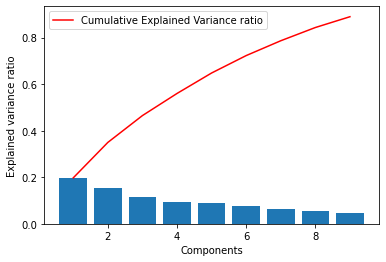

In [15]:
models(sleep_dxch_2g,drop_lst,'final_dxch')

After undersampling data size is 154 ; Resampled dataset shape Counter({'MCI-AD': 77, 'MCI-MCI': 77})

10 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.490
          - saga_L1, average weighted f1-score of 10-cross validation:0.326
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.490
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.534
          - saga_L1, average weighted f1-score of 10-cross validation:0.326
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.534
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.591
          - saga_L1, average weighted f1-score of 10-cross validation:0.483
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.591
       - C = 1
          -

          - 15trees. average weighted f1-score of 10-cross validation:0.499
          - 20trees. average weighted f1-score of 10-cross validation:0.508
          - 25trees. average weighted f1-score of 10-cross validation:0.514
          - 30trees. average weighted f1-score of 10-cross validation:0.523
          - 35trees. average weighted f1-score of 10-cross validation:0.515
          - 40trees. average weighted f1-score of 10-cross validation:0.510
          - 45trees. average weighted f1-score of 10-cross validation:0.523
          - 50trees. average weighted f1-score of 10-cross validation:0.508
          - 55trees. average weighted f1-score of 10-cross validation:0.514
          - 60trees. average weighted f1-score of 10-cross validation:0.514
          - 65trees. average weighted f1-score of 10-cross validation:0.507
          - 70trees. average weighted f1-score of 10-cross validation:0.514
          - 75trees. average weighted f1-score of 10-cross validation:0.507
          - 

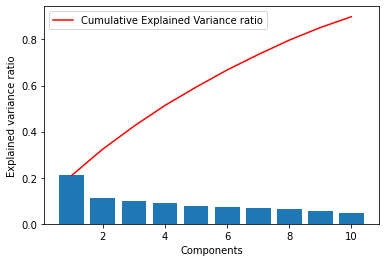

In [457]:
cv_models(sleep_dxch_2g,drop_lst,'DXCHANGE',10)

After undersampling data size is 123 ; Resampled dataset shape Counter({'MCI-AD': 41, 'MCI-CN': 41, 'MCI-MCI': 41})

9 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.621, Test set f1-score: 0.447
          - saga_L1, Training set f1-score:0.504, Test set f1-score: 0.485
          - newton-cg_L2, Training set f1-score:0.621, Test set f1-score: 0.447
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.588, Test set f1-score: 0.396
          - saga_L1, Training set f1-score:0.504, Test set f1-score: 0.485
          - newton-cg_L2, Training set f1-score:0.588, Test set f1-score: 0.396
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.595, Test set f1-score: 0.440
          - saga_L1, Training set f1-score:0.534, Test set f1-score

          - 30trees. f1-score on training data: 0.938 f1-score on test data: 0.366
          - 35trees. f1-score on training data: 0.938 f1-score on test data: 0.337
          - 40trees. f1-score on training data: 0.938 f1-score on test data: 0.367
          - 45trees. f1-score on training data: 0.938 f1-score on test data: 0.367
          - 50trees. f1-score on training data: 0.938 f1-score on test data: 0.372
          - 55trees. f1-score on training data: 0.938 f1-score on test data: 0.335
          - 60trees. f1-score on training data: 0.938 f1-score on test data: 0.335
          - 65trees. f1-score on training data: 0.938 f1-score on test data: 0.372
          - 70trees. f1-score on training data: 0.938 f1-score on test data: 0.372
          - 75trees. f1-score on training data: 0.938 f1-score on test data: 0.372
          - 80trees. f1-score on training data: 0.938 f1-score on test data: 0.344
          - 85trees. f1-score on training data: 0.938 f1-score on test data: 0.344
    

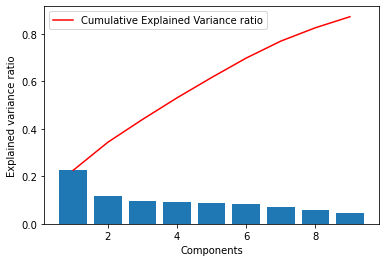

In [444]:
models(sleep_dxch_3g,drop_lst,'DXCHANGE')

normal data: random forest: 85trees. f1-score on training data: 0.969 f1-score on test data: 0.780
normal data: random forest: 85trees. f1-score on training data: 0.969 f1-score on test data: 0.780

pca:decision tree: tree depth: 6.000. f1-score on training data: 0.891 f1-score on test data: 0.810

After undersampling data size is 123 ; Resampled dataset shape Counter({'MCI-AD': 41, 'MCI-CN': 41, 'MCI-MCI': 41})

9 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.433
          - saga_L1, average weighted f1-score of 10-cross validation:0.160
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.433
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.476
          - saga_L1, average weighted f1-score of 10-cross validation:0.167
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.476
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.440
          - saga_L1, average weighted f1-score of 10-cross validation:0.419
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.440
       - C = 

C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


          - saga_L1, average weighted f1-score of 10-cross validation:0.440
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.442
       - C = 100
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.431


C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


          - saga_L1, average weighted f1-score of 10-cross validation:0.431
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.431
       - C = 1000
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.421


C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


          - saga_L1, average weighted f1-score of 10-cross validation:0.432
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.421
    - Decision tree
          - tree depth: 1.000. average weighted f1-score of 10-cross validation:0.398
          - tree depth: 2.000. average weighted f1-score of 10-cross validation:0.421
          - tree depth: 3.000. average weighted f1-score of 10-cross validation:0.386
          - tree depth: 4.000. average weighted f1-score of 10-cross validation:0.391
          - tree depth: 5.000. average weighted f1-score of 10-cross validation:0.349
          - tree depth: 6.000. average weighted f1-score of 10-cross validation:0.332
          - tree depth: 7.000. average weighted f1-score of 10-cross validation:0.347
          - tree depth: 8.000. average weighted f1-score of 10-cross validation:0.361
          - tree depth: 9.000. average weighted f1-score of 10-cross validation:0.359
          - tree depth: 10.000. average weighted 

C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


          - saga_L1, average weighted f1-score of 10-cross validation:0.437
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.437
       - C = 1000
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.437


C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\weipi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

          - saga_L1, average weighted f1-score of 10-cross validation:0.444
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.437
    - Decision tree
          - tree depth: 1.000. average weighted f1-score of 10-cross validation:0.345
          - tree depth: 2.000. average weighted f1-score of 10-cross validation:0.415
          - tree depth: 3.000. average weighted f1-score of 10-cross validation:0.388
          - tree depth: 4.000. average weighted f1-score of 10-cross validation:0.375
          - tree depth: 5.000. average weighted f1-score of 10-cross validation:0.290
          - tree depth: 6.000. average weighted f1-score of 10-cross validation:0.348
          - tree depth: 7.000. average weighted f1-score of 10-cross validation:0.348
          - tree depth: 8.000. average weighted f1-score of 10-cross validation:0.342
          - tree depth: 9.000. average weighted f1-score of 10-cross validation:0.317
          - tree depth: 10.000. average weighted 

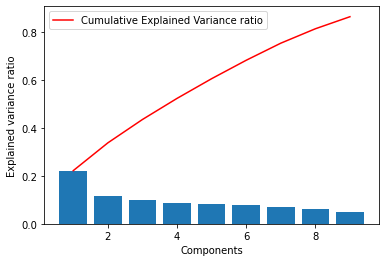

In [458]:
cv_models(sleep_dxch_3g,drop_lst,'DXCHANGE',10)

After undersampling data size is 190 ; Resampled dataset shape Counter({'AD-AD': 38, 'CN-MCI': 38, 'MCI-AD': 38, 'MCI-CN': 38, 'MCI-MCI': 38})

10 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.442, Test set f1-score: 0.242
          - saga_L1, Training set f1-score:0.357, Test set f1-score: 0.233
          - newton-cg_L2, Training set f1-score:0.442, Test set f1-score: 0.242
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.441, Test set f1-score: 0.249
          - saga_L1, Training set f1-score:0.357, Test set f1-score: 0.233
          - newton-cg_L2, Training set f1-score:0.441, Test set f1-score: 0.249
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.429, Test set f1-score: 0.230
          - saga_L1, Training set f1-sc

          - 30trees. f1-score on training data: 0.914 f1-score on test data: 0.294
          - 35trees. f1-score on training data: 0.914 f1-score on test data: 0.239
          - 40trees. f1-score on training data: 0.914 f1-score on test data: 0.271
          - 45trees. f1-score on training data: 0.914 f1-score on test data: 0.237
          - 50trees. f1-score on training data: 0.914 f1-score on test data: 0.237
          - 55trees. f1-score on training data: 0.914 f1-score on test data: 0.271
          - 60trees. f1-score on training data: 0.914 f1-score on test data: 0.265
          - 65trees. f1-score on training data: 0.914 f1-score on test data: 0.270
          - 70trees. f1-score on training data: 0.914 f1-score on test data: 0.271
          - 75trees. f1-score on training data: 0.914 f1-score on test data: 0.271
          - 80trees. f1-score on training data: 0.915 f1-score on test data: 0.270
          - 85trees. f1-score on training data: 0.914 f1-score on test data: 0.270
    

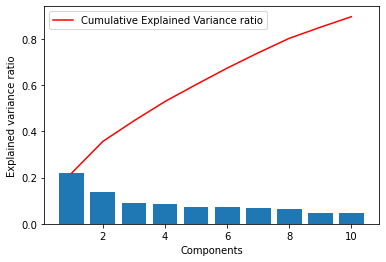

In [452]:
models(sleep_dxch_6g,drop_lst,'DXCHANGE')